In [51]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter

In [52]:
hdulist = fits.open('/Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_BLU_WXY_300480-300520.fits')

In [53]:
hdulist.info()

Filename: /Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_BLU_WXY_300480-300520.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     314   ()      
  1  FLUX          1 ImageHDU        28   (40, 41, 63)   float64   
  2  ERROR         1 ImageHDU        28   (40, 41, 63)   float64   
  3  UNCORRECTED_FLUX    1 ImageHDU        28   (40, 41, 63)   float64   
  4  UNCORRECTED_ERROR    1 ImageHDU        28   (40, 41, 63)   float64   
  5  WAVELENGTH    1 ImageHDU         7   (63,)   float64   
  6  X             1 ImageHDU         7   (40,)   float64   
  7  Y             1 ImageHDU         7   (41,)   float64   
  8  TRANSMISSION    1 ImageHDU         7   (63,)   float32   
  9  RESPONSE      1 ImageHDU         7   (63,)   float32   
 10  EXPOSURE_MAP    1 ImageHDU        28   (40, 41, 63)   int16   


In [54]:
wavelengths = hdulist[5].data

print(wavelengths)

wav_diff = []

for i in range(0, len(wavelengths)-1):
    wav_diff.append(wavelengths[i+1]-wavelengths[i])
  
wav_diff = np.average(wav_diff)

print(wav_diff)

[51.70209157 51.70930372 51.71651587 51.72372801 51.73094016 51.73815231
 51.74536446 51.7525766  51.75978875 51.7670009  51.77421304 51.78142519
 51.78863734 51.79584949 51.80306163 51.81027378 51.81748593 51.82469807
 51.83191022 51.83912237 51.84633452 51.85354666 51.86075881 51.86797096
 51.8751831  51.88239525 51.8896074  51.89681955 51.90403169 51.91124384
 51.91845599 51.92566813 51.93288028 51.94009243 51.94730458 51.95451672
 51.96172887 51.96894102 51.97615316 51.98336531 51.99057746 51.99778961
 52.00500175 52.0122139  52.01942605 52.02663819 52.03385034 52.04106249
 52.04827464 52.05548678 52.06269893 52.06991108 52.07712322 52.08433537
 52.09154752 52.09875967 52.10597181 52.11318396 52.12039611 52.12760826
 52.1348204  52.14203255 52.1492447 ]
0.0072121471679118315


In [55]:
hdulist_spec = fits.open('/Users/thepoetoftwilight/Desktop/F0252_FI_IFS_0301354_BLU_WXY_300480-300520-1D.fits')

In [56]:
central_fluxes_unfiltered = hdulist_spec[0].data
    
central_fluxes_unfiltered = [flux*(10**(-26)) for flux in central_fluxes_unfiltered]

c = 3*10**8

for i in range(0, len(wavelengths)):
    
    wavelength = wavelengths[i]
    
    central_fluxes_unfiltered[i] = central_fluxes_unfiltered[i]*(c/(wavelength*10**(-6))**2)*(10**(-6))
    
central_fluxes_unfiltered = np.array(central_fluxes_unfiltered)

In [57]:
print(central_fluxes_unfiltered)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.24803882e-13  4.92027219e-14
  4.46465827e-14  5.21210184e-14  6.98575924e-14  2.94603259e-14
  1.34152617e-14  9.12697463e-15  2.42302082e-14 -1.17878628e-14
  2.30129849e-14  8.35582637e-15  4.88601748e-14  3.56640465e-14
  1.58781736e-14  1.07053687e-14 -9.26931108e-15  2.28676276e-14
 -1.68274173e-15 -2.71609605e-14 -8.23621403e-16  3.14392112e-14
  2.84384414e-14  1.35056266e-14  1.85848576e-14  7.84322973e-15
 -3.79784215e-16  2.76370117e-14  4.39217069e-14  3.40335807e-14
  3.45096943e-15 -1.14287470e-14  1.24021126e-14  9.21658567e-15
  5.35101401e-15 -3.18393242e-16  1.57491065e-14 -1.17453289e-16
 -1.28254766e-14 -1.94849942e-14 -9.40850808e-15 -2.66872700e-16
 -5.07536377e-15 -9.33810823e-16 -1.80598520e-14 -2.56962331e-14
 -2.57306661e-14 -1.51844193e-14  1.04044438e-14 -3.21472627e-14
 -1.71815367e-14 -3.52621794e-15 -3.33150681e-14 -6.26090926e-14
 -4.44035340e-14  0.00000

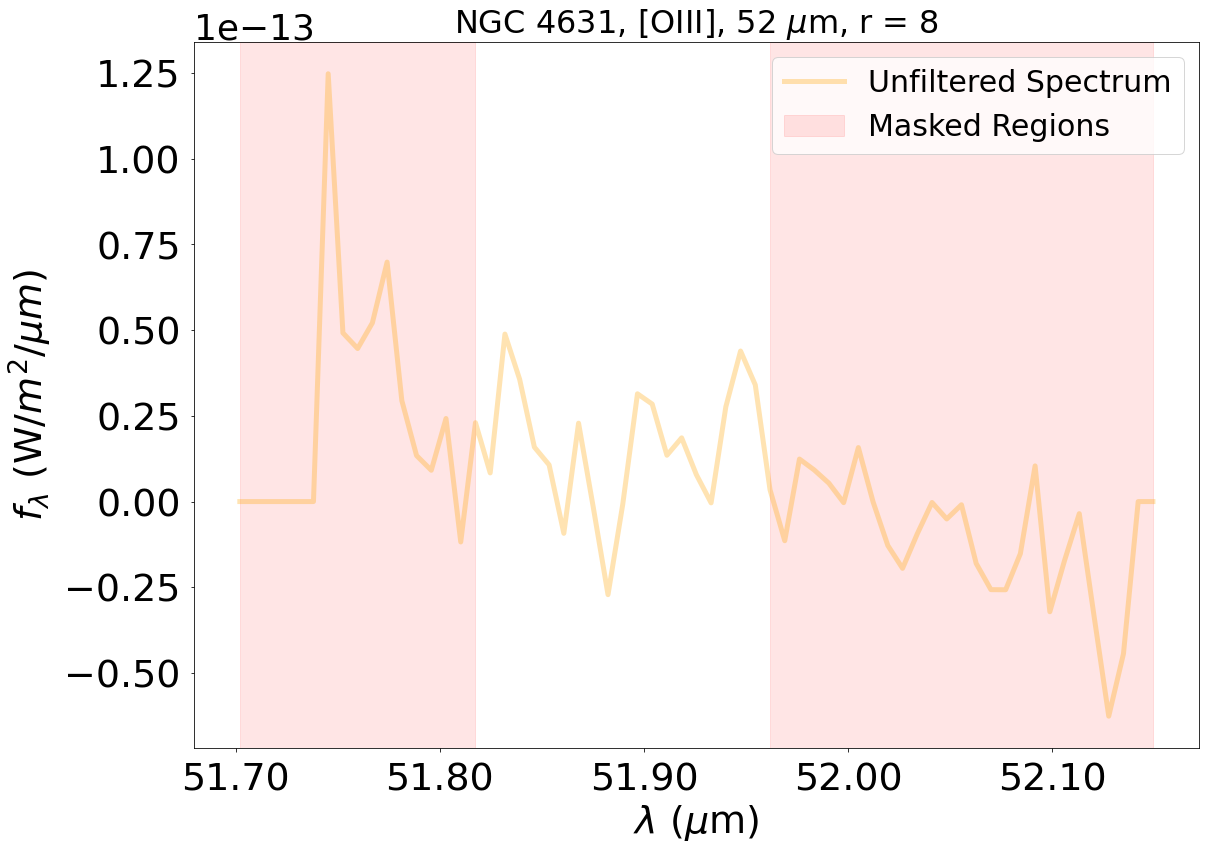

In [58]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.plot(wavelengths, central_fluxes_unfiltered, label = 'Unfiltered Spectrum', lw = 5, color = 'orange', alpha = 0.3)
ax.axvspan(wavelengths[0], wavelengths[16], color = 'red', alpha = 0.1, label = 'Masked Regions')
ax.axvspan(wavelengths[-27], wavelengths[-1], color = 'red', alpha = 0.1)

ax.set_xlabel(r'$\lambda$ ($\mu$m)', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$f_{\lambda}$ (W/$m^{2}$/$\mu m$)', fontsize = 38, labelpad = 10)
ax.set_title(r'NGC 4631, [OIII], 52 $\mu$m, r = 8', fontsize = 32)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

plt.savefig('/Users/thepoetoftwilight/Desktop/1-[OIII]-unfiltered_spectrum.png')

ax.legend(prop={'size': 30}, loc = 'upper right')